<a href="https://colab.research.google.com/github/Jiho-korea/DeepLearning/blob/master/%EC%98%88%EC%A0%9C3_%EB%B0%B0%EC%B9%98_KFold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
!pip install --upgrade tensorflow==1.15.0

     |████████████████████████████████| 412.3MB 38kB/s 
     |████████████████████████████████| 512kB 43.7MB/s 
     |████████████████████████████████| 3.8MB 44.9MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=49db15d3115b3515ba5eb4faba5ab3b6270273bc5d3aa57339526af28c4c069c
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.2.0
    Uninstalling tensorflow-estimator-2.2.0:
      Successfully uninstalled tensorflow-estimator-2.2.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorboard 2.2.1
    Uninstalling tensorboard-2.2.1:
      Successfully uninstalled tensorboard-2.2.1
  Found existing installatio

In [0]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [0]:
tf.set_random_seed(777)

In [0]:
# 데이터 확인, 분석을 위해 numpy로 불러들이는 것이 아닌 pandas 를 사용함 
xy_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/DeepLearningPrac/tensorflowPrac/tensorflowHW/예제3_부동산가격.csv') # numpy 대신 pandas 를 사용해 칼럼명까지 같이 읽어들임
xy_df = xy_df.dropna(how='all', axis=0)  # 결측치 제거

In [0]:
xy_df.drop("No", axis=1, inplace=True)  # 필요없는 칼럼(번호) 제거

In [0]:
xy_df.columns = ['거래 일자', '집 나이', '역까지의 거리', '주변 편의점', '위도', '경도', '단위 면적당 가격']  # 칼럼명 한글로 변경
xy_df # 데이터프레임 확인

,거래 일자,집 나이,역까지의 거리,주변 편의점,위도,경도,단위 면적당 가격
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [0]:
# 레이블 데이터만 추출
y_data_df = xy_df.iloc[:,-1]

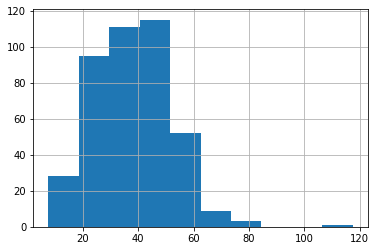

In [0]:
# 히스토그램 그리기
y_data_df.hist()

In [0]:
# 로그를 적용해 레이블 데이터를 정규분포형태로 변경
y_log_data_df = np.log1p(y_data_df)

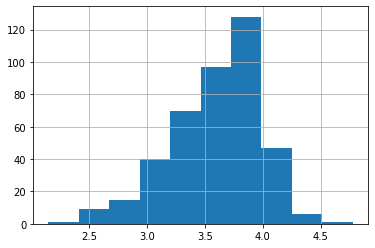

In [0]:
# 왜곡이 많이 감소하였다
y_log_data_df.hist()

In [0]:
y_data = y_log_data_df.values.reshape(-1,1)  # 정규분포된 레이블 데이터(의료비용)를 numpy로 추출
x_data = xy_df.drop("단위 면적당 가격", axis=1).values  # 피쳐데이터를 numpy로 추출

# 넘파이 배열 내 데이터타입 변경
x_data = x_data.astype('float32')
y_data = y_data.astype('float32')

In [0]:
print(y_data.shape)
print(y_data[:7]) #레이블 확인

(414, 1)
[[3.6609943]
 [3.7658405]
 [3.8774316]
 [4.021774 ]
 [3.7864597]
 [3.4995332]
 [3.7208624]]


In [0]:
print(x_data.shape)
print(x_data[:7,:]) # 피쳐 확인

(414, 6)
[[2012.917     32.        84.87882   10.        24.98298  121.54024]
 [2012.917     19.5      306.5947     9.        24.98034  121.53951]
 [2013.583     13.3      561.9845     5.        24.98746  121.54391]
 [2013.5       13.3      561.9845     5.        24.98746  121.54391]
 [2012.833      5.       390.5684     5.        24.97937  121.54245]
 [2012.667      7.1     2175.03       3.        24.96305  121.51254]
 [2012.667     34.5      623.4731     7.        24.97933  121.53642]]


In [0]:
# 테스트세트를 분리
x_train_all, x_test, y_train_all, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=777) # 전체 데이터중 20%

In [0]:
print("학습용 ",x_train_all.shape, "\t", y_train_all.shape) # 학습용 피쳐, 레이블 데이터 
print("테스트용 ",x_test.shape, "\t", y_test.shape) # 테스트용 피쳐, 레이블 데이터

학습용  (331, 6) 	 (331, 1)
테스트용  (83, 6) 	 (83, 1)


In [0]:
# 텐서플로우 그래프 그리기
num_x = 6
X = tf.placeholder(tf.float32, shape=[None, num_x]) 
Y = tf.placeholder(tf.float32, shape=[None, 1])
W = tf.Variable(tf.random.normal([num_x , 1]), name='weight') 
b = tf.Variable(tf.random.normal([1]), name='bias')

In [0]:
hypothesis =  tf.matmul(X, W) + b

In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.0001) 

In [0]:
train = optimizer.minimize(cost)

In [0]:
sess = tf.Session()

In [0]:
sess.run(tf.global_variables_initializer())

In [0]:
w_history = [] # 변화하는 가중치 행렬을 담기위한 리스트
cost_list = [] # 감소하는 cost를 담기위한 리스트

In [0]:
n_fold = 10 # 10개의 폴드로 나눌예정
kfold = KFold(n_splits=n_fold) 
cv_mse = [] # 폴드세트별 MSE를 저장할 리스트

In [0]:
train_fold_mean = 0
train_fold_std = 0

In [0]:
epochs = 4001
for step in range(epochs):
  fold_cost = 0
  fold_mse = 0
  for train_index, test_index in kfold.split(x_train_all):
    # 학습폴드, 검증폴드 분리(피쳐, 레이블 별)
    train_feature_fold, val_feature_fold = x_train_all[train_index], x_train_all[test_index]
    train_label_fold, val_label_fold = y_train_all[train_index], y_train_all[test_index]

    # 학습폴드를 기준으로 표준화해야한다.
    train_fold_mean = np.mean(train_feature_fold, axis=0) # 학습폴드의 각피쳐의 평균
    train_fold_std = np.std(train_feature_fold, axis=0) # 학습폴드의 각피쳐의 표준편차
    
    # 학습폴드를 기준으로 학습폴드, 검증폴드를 표준화
    train_feature_fold_scaled = (train_feature_fold - train_fold_mean) / train_fold_std
    val_feature_fold_scaled = (val_feature_fold - train_fold_mean) / train_fold_std

    # 학습폴드로 학습 
    cost_val, hy_val, W_all, _ = sess.run([cost, hypothesis, W, train], feed_dict={X:train_feature_fold_scaled, Y:train_label_fold})
    fold_cost += cost_val
    w_history.append(W_all.copy())  

    # 폴드세트별 MSE 저장 
    prediction = sess.run(hypothesis, feed_dict={X:val_feature_fold_scaled})  # 검증 세트에 대한 예측값 구하기
    fold_mse += np.mean(np.square(np.expm1(prediction) - np.expm1(val_label_fold)))
  
  cv_mse.append(fold_mse/n_fold) # epoch 별 검증폴드의 평균 MSE를 저장한다
  cost_list.append(fold_cost/n_fold) # epoch 별 학습폴드의 평균 cost를 저장한다

  if step % 200 == 0:
    print("step=",step,", cost=", fold_cost/n_fold, ", val_cost=",fold_mse/n_fold)
  

step= 0 , cost= 14.967663860321045 , val_cost= 1273.86669921875
step= 200 , cost= 6.1694361686706545 , val_cost= 1185.4615417480468
step= 400 , cost= 2.9134777069091795 , val_cost= 1008.6610961914063
step= 600 , cost= 1.4647900342941285 , val_cost= 787.7168090820312
step= 800 , cost= 0.7735616445541382 , val_cost= 576.315884399414
step= 1000 , cost= 0.4314460873603821 , val_cost= 407.1325256347656
step= 1200 , cost= 0.2568481519818306 , val_cost= 286.26160583496096
step= 1400 , cost= 0.16493963152170182 , val_cost= 205.80924072265626
step= 1600 , cost= 0.11501271650195122 , val_cost= 154.52582550048828
step= 1800 , cost= 0.08705261871218681 , val_cost= 122.67619705200195
step= 2000 , cost= 0.07095146179199219 , val_cost= 103.21076316833496
step= 2200 , cost= 0.061452103033661845 , val_cost= 91.44597015380859
step= 2400 , cost= 0.05573429353535175 , val_cost= 84.40656890869141
step= 2600 , cost= 0.05223739929497242 , val_cost= 80.24543209075928
step= 2800 , cost= 0.05007223822176456 , v

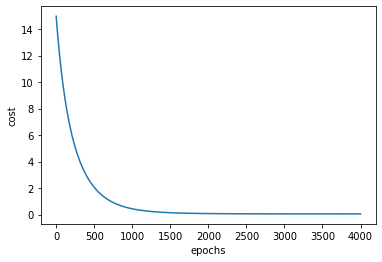

In [0]:
plt.plot(cost_list)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()

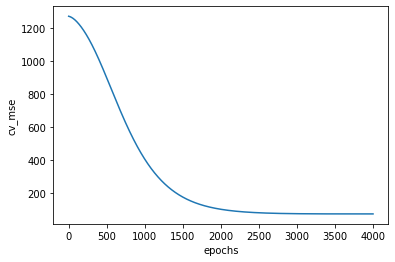

In [0]:
plt.plot(cv_mse)
plt.xlabel("epochs")
plt.ylabel("cv_mse")
plt.show()

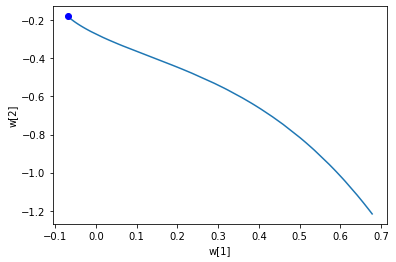

In [0]:
# 가중치 업데이트 과정 그래프 (연식, 가까운 역 거리)
w1 = []
w2 = []
for w in  w_history:
  w1.append(w[1])
  w2.append(w[2])
plt.plot(w1, w2)
plt.plot(w1[-1], w2[-1],'bo')
plt.xlabel('w[1]')
plt.ylabel('w[2]')
plt.show()

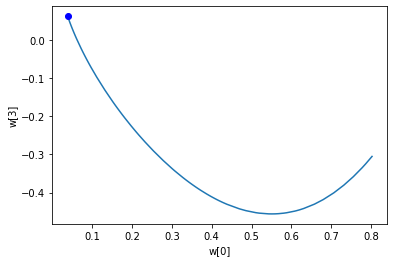

In [0]:
# 가중치 업데이트 과정 그래프 (거래일자, 편의점)
w0 = []
w3 = []
for w in  w_history:
  w0.append(w[0])
  w3.append(w[3])
plt.plot(w0, w3)
plt.plot(w0[-1], w3[-1],'bo')
plt.xlabel('w[0]')
plt.ylabel('w[3]')
plt.show()

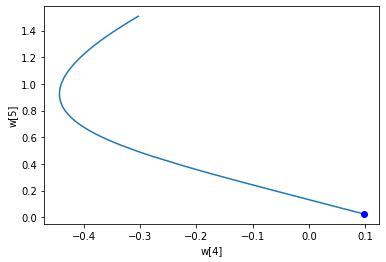

In [0]:
# 가중치 업데이트 과정 그래프 (위도, 경도)
w4 = []
w5 = []
for w in  w_history:
  w4.append(w[4])
  w5.append(w[5])
plt.plot(w4, w5)
plt.plot(w4[-1], w5[-1],'bo')
plt.xlabel('w[4]')
plt.ylabel('w[5]')
plt.show()

In [0]:
# 표준화를 쉽게 하기 위해 함수정의 -> 같은 비율로 전처리 하기 위해 학습폴드의 평균, 표준편차를 그대로 사용한다.
def standardScaler(data):
  data_scaled = (data - train_fold_mean) / train_fold_std
  return data_scaled

In [0]:
# 내가 정한 임의의 값으로 예측하기 -> 표준화한 데이터로 모델을 만들었기 때문에 임의의 값을 넣어줄때도 임의의 값을 표준화 해주어야 합니다.
X_test = np.array([[2013., 32., 86., 10., 24.98066, 121.5402]])
print(X_test)
X_test_scaled = standardScaler(X_test)
print(X_test_scaled)

[[2013.        32.        86.        10.        24.98066  121.5402 ]]
[[-0.49826906  1.2653358  -0.78227251  1.96124505  0.87238935  0.47151112]]


In [0]:
# print(np.expm1(sess.run(hypothesis, feed_dict={X:val_feature_fold_scaled})))
print(np.expm1(sess.run(hypothesis, feed_dict={X:X_test_scaled}))) # 예측한 값은 expm1 함수를 사용해 원래의 scale로 되돌려야함

[[45.91282]]


In [0]:
# 임의의 샘플데이터 5개로 예측값 구해보기
X_test_5 = np.array([[2013., 32., 86., 10., 24.93066, 121.50022],  
                     [2020., 1., 300., 0., 24.90066, 121.53002],   
                     [1970., 100., 5., 5., 24.92066, 121.55402],   
                     [2009., 10., 10., 7., 24.95066, 121.52402], 
                     [2010., 20., 50., 2., 25.08066, 121.51402]]) 

X_test_5_scaled = standardScaler(X_test_5)

In [0]:
print(np.expm1(sess.run(hypothesis, feed_dict={X:X_test_5_scaled})))

[[28.645176  ]
 [59.33165   ]
 [-0.94620913]
 [21.85062   ]
 [58.768364  ]]


In [0]:
try:
  x_input = input("입력(거래 일자, 연식, 가까운 역, 편의점 개수, 위도, 경도): ")
  if x_input == 'x':
    raise NotImplementedError
  x_input_strip =[ float(i.strip()) for i in x_input.split(",")]
  print("거래 일자\t연식\t\t가까운 역\t편의점 개수\t위도\t\t경도")
  for i in x_input_strip:
    print(i,end="\t\t")
  print()
  x_input_test = np.array([x_input_strip]).astype('float32')

  x_input_test_scaled = standardScaler(x_input_test)

  print("예상 부동산가격 : ",np.expm1(sess.run(hypothesis, feed_dict={X:x_input_test_scaled}))) 
  
except ValueError:
  print("입력을 다시 확인해주세요")
except NotImplementedError:
  print("종료")


입력(거래 일자, 연식, 가까운 역, 편의점 개수, 위도, 경도): 2020,0,6,1,23,123
거래 일자	연식		가까운 역	편의점 개수	위도		경도
2020.0		0.0		6.0		1.0		23.0		123.0		
예상 부동산가격 :  [[-0.99972713]]


In [0]:
sess.close()